# Introduction to Data Science – Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 21, 2025 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the satisfaction level of airline passengers (Part 2). We hope these exercises will give you an idea of the broad usage of classification methods. 

## Your Data
First Name: Andrea
<br>
Last Name: Stofko
<br>
E-mail: andrea.stofko@utah.edu
<br>
UID: u6040357
<br>

In [3]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: MNIST handwritten digits

The MNIST handwritten digit dataset is a famous test dataset containing images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied on them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. For example, [this webpage](http://dia.fi.upm.es/~lbaumela/PracRF11/MNIST.html) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

1) Classes: 10 (one for each digit)
2) Samples total: 1797
3) Samples per class: $\approx$180
4) Dimensionality: 64 (8 pixels by 8 pixels)
5) Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [4]:
digits = load_digits()
#X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [5]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

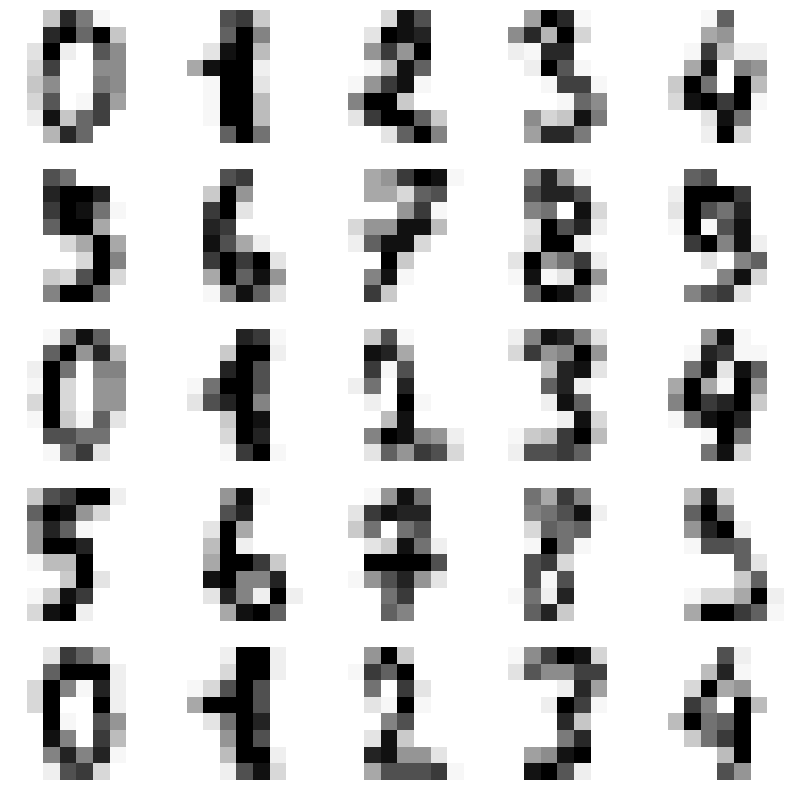

In [6]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to be generally helpful for this exercise. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
    1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
    2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
    3. Print all of these misclassified digits as images. 
    4. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 400. What is the best value? 
    5. Try to train and test the algorithm on the raw (non-scaled) data. Report the accuracy score and confusion matrix for different settings of `gamma`. You may use whatever C value you determined worked well on the scaled data in "part 4". What is your observation of the results on the raw data?

1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.

In [7]:
#use starter code to split the data (X = scale(digits.data), y = digits.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

#create svm model using rbf kernal, C=100
num_model = svm.SVC(kernel='rbf',C=100,gamma='scale') #gamma='scale' uses default of 1/(n_features * X.var()) for gamma
#fit model
num_model.fit(X_train, y_train)

SVC(C=100)

2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**

In [8]:
print('Confusion Matrix:')
y_pred = num_model.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Accuracy =  0.9534075104311543


**Your Interpretation**: The confusion matrix indicates that the model makes mistakes most often with the 8th column which corresponds to the digit, 7. The largest number of false positives result from this digit. However the model does have an accuracy of 0.95.

3. Print all of these misclassified digits as images.

In [9]:
print(y_pred)

[1 5 0 ... 6 3 2]


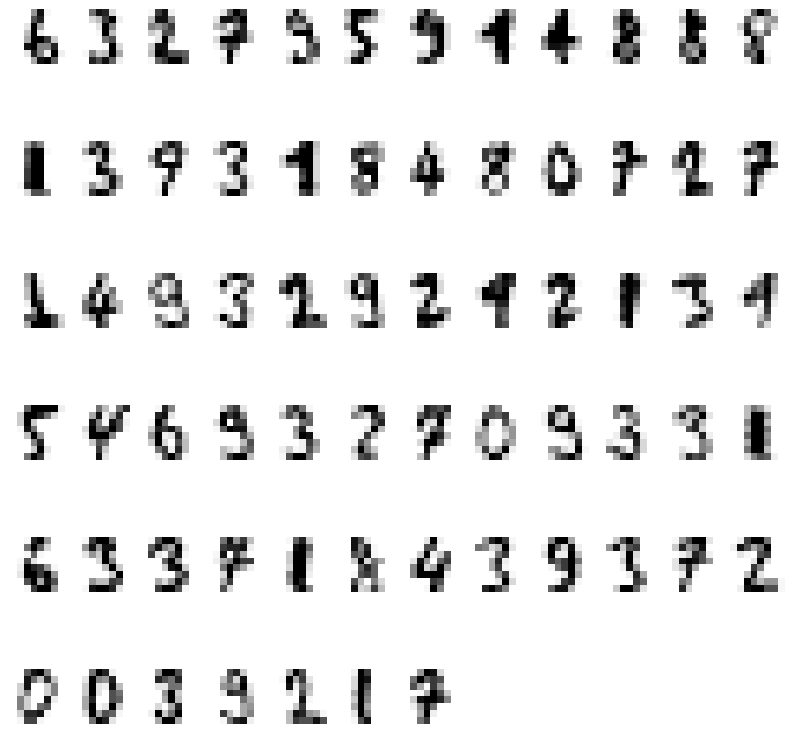

In [10]:
#create function that will print all missclassified value as the corresponding digit:

#find where the predicted value does not equal test
missclass = np.where(y_pred != y_test)[0]

#len(missclass) #67

#set up figure
plt.figure(figsize= (10, 10)) 

for i,j in enumerate(missclass[0:len(missclass)]): 
    plt.subplot(6, 12, i+1)
    plt.imshow(np.reshape(digits.images[j],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    
plt.show()

****4. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 400. What is the best value?****

(The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.)

In [36]:
#create list that is 100 digits long and samples every fourth
sampling = range(1,400,4)
len(sampling) #100

#create empty list to store accuracy scores in:
accuracy_scores = []

#test different values of C:
for c in sampling:
    score = cross_val_score(estimator = num_model, X = X_test, y = y_test, cv=c, scoring='accuracy')
    accuracy_scores.append((c, score))

#find C that has max accuracy
max_accuracy = max(accuracy_scores, key = lambda x:x[1])
print("#1 Part 4:",max_accuracy)   

InvalidParameterError: The 'cv' parameter of cross_val_score must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

For this model, c=5 produces the highest accuracy score.

5. Try to train and test the algorithm on the raw (non-scaled) data. Report the accuracy score and confusion matrix for different settings of `gamma`. You may use whatever C value you determined worked well on the scaled data in "part 4". What is your observation of the results on the raw data?

In [19]:
#set up un-scaled data
X2 = digits.data
y2 = digits.target

#create models using c=5 (from part 4) and different gammas

#split data using the non-scaled data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1, test_size=0.8)

#create models using different gamma values (0.01-1)
#gamma = 0.01
num_model2a = svm.SVC(kernel='rbf',C=5,gamma=0.01) 
num_model2a.fit(X2_train, y2_train)

#gamma = 0.1
num_model2b = svm.SVC(kernel='rbf',C=5,gamma=0.1) 
num_model2b.fit(X2_train, y2_train)

#gamma = 1
num_model2c = svm.SVC(kernel='rbf',C=5,gamma=1) 
num_model2c.fit(X2_train, y2_train)

y_pred2a = num_model2a.predict(X2_test)
y_pred2b = num_model2b.predict(X2_test)
y_pred2c = num_model2c.predict(X2_test)

#with gamma = 0.01
print("Confusion Matrix for Gamma = 0.01")
print(metrics.confusion_matrix(y_true = y2_test, y_pred = y_pred2a))
print('Accuracy with gamma = 0.01 is ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred2a))
print()

#with gamma = 0.1
print("Confusion Matrix for Gamma = 0.1")
print(metrics.confusion_matrix(y_true = y2_test, y_pred = y_pred2b))
print('Accuracy with gamma = 0.1 is ', metrics.accuracy_score(y_true = y2_test, y_pred = y_pred2b))
print()

#with gamma = 1
print("Confusion Matrix for Gamma = 1")
print(metrics.confusion_matrix(y_true = y2_test, y_pred = y_pred2c))
print('Accuracy with gamma = 1 is ', metrics.accuracy_score(y_true = y2_test, y_pred = y_pred2c))
print()

Confusion Matrix for Gamma = 0.01
[[118   0   0   0   0   0   0   0  12   0]
 [  0  42   0   0   0   0   0   0 107   0]
 [  0   0  34   0   0   0   0   0 108   0]
 [  0   0   0  47   0   0   0   0 100   0]
 [  0   0   0   0  11   0   0   0 141   0]
 [  0   0   0   0   0  24   0   0 123   0]
 [  0   0   0   0   0   0  71   0  75   0]
 [  0   0   0   0   0   0   0  67  73   0]
 [  0   0   0   0   0   0   0   0 133   0]
 [  0   0   0   0   0   0   0   0 150   2]]
Accuracy with gamma = 0.01 is  0.38178025034770513

Confusion Matrix for Gamma = 0.1
[[130   0   0   0   0   0   0   0   0   0]
 [149   0   0   0   0   0   0   0   0   0]
 [142   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [146   0   0   0   0   0   0   0   0   0]
 [140   0   0   0   0   0   0   0   0   0]
 [133   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]]
Accuracy with gamma

When using the unscaled raw data, the low gamma value performs the best in terms of accuracy. Using a lower gamma value could be more appropriate for unscaled data due to the fact that this model would be less prone to trying to overfitting data that does not follow the same distribution as scaled data. 

### Task 1.2: Prediction with k-nearest neighbors
`Repeat` task 1.1 using k-nearest neighbors (k-NN). In part 2, use k=10. In part 5, find the best value of k. 

Work on every single question except the last one (You don't need to handle the non-scaled data here) in task 1.1 

Steps copied from 1.1:
1. Build a classifier using the *training dataset*.
2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
3. Print all of these misclassified digits as images. 
4. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 400. What is the best value? 

1.2.1. Build a classifier using the training dataset.

In [24]:
#1:build a knn classifier

#Initialize model using k = 10:
kNNmodel = KNeighborsClassifier(n_neighbors = 10)

#Train model using scaled digits training data defined above
kNNmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

1.2.2. Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix. What is the most common mistake that the classifier makes? Note: this corresponds to the largest off-diagonal entry of the confusion matrix.

In [30]:
#using test dataset, evaluate the accuracy of the kNNmodel:

print('Confusion Matrix:')
y_pred_k = kNNmodel.predict(X_test) #make new predicted values variable (y_pred_k)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_k))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_k))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874


Like the SVM model, the kNN model also struggled to properly classify the digit 8, but the kNN model also struggles with the digit 1 slightly. The accuracy of this model was 0.91 in comparison to 0.95 for the SVM model.

1.2.3. Print all of these misclassified digits as images.

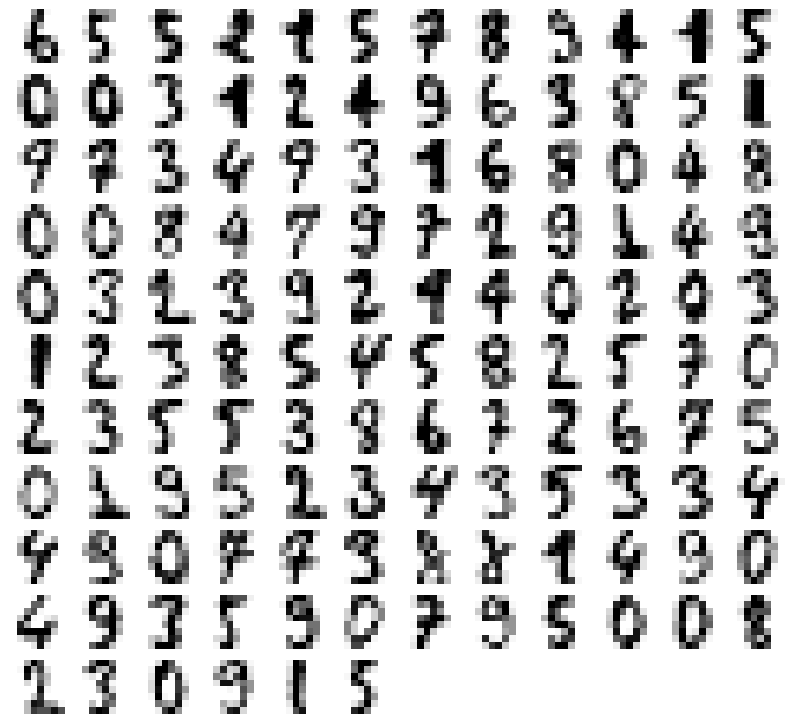

In [32]:
#for the kNN model, print all the misclassified digits as images:

#find where the predicted value does not equal test
missclass_k = np.where(y_pred_k != y_test)[0]

#len(missclass_k) #136

#set up figure
plt.figure(figsize= (10, 10)) 

for i,j in enumerate(missclass_k[0:len(missclass_k)]): 
    plt.subplot(12, 12, i+1)
    plt.imshow(np.reshape(digits.images[j],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
    
plt.show()

In [34]:
#create list that is 100 digits long and samples every fourth
sampling = range(1,400,4)
len(sampling) #100

#create empty list to store accuracy scores in:
accuracy_scores_k = []

#test different values of k:
for k in sampling:
    #Initialize model using different values of k:
    test_model_k = KNeighborsClassifier(n_neighbors = k)
    #Train model
    test_model_k.fit(X_train, y_train)
    y_pred = test_model_k.predict(X_test)
    score = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    accuracy_scores_k.append((c, score))
    
#find C that has max accuracy
max_accuracy_k = max(accuracy_scores_k, key = lambda x:x[1])
print("#1 Part 2.4 :",max_accuracy_k) 

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 361, n_samples_fit = 359, n_samples = 1438

**Your Interpretation**: TODO

# Part 2: Satisfaction of Airline Passengers

For this problem, you will use classification tools to predict the satisfaction of airline passengers based on attributes such as the seat comfort, inflight wifi service, ease of online booking, leg-room service, check-in service, and some variables related to the content of the dataset. You can learn details about the dataset in the [info.txt](./Satisfaction/info.txt). 

The dataset contains variables describing 103904 airline passengers.
There are 25 variables associated with each passenger. Of these, 23 are *predictor* variables and 1 variable (id) will not be used. The 'satisfaction' column is what we will use to define the satisfaction level of the passengers, which is what we will try to predict. You should read about the predictor variables in the file *info.txt*.

### Task 2.1 Import and preprocessing the data 
* Use the pandas.read_csv() function to import the dataset. Then, **print** shape of the data and first few lines of data.
* Convert the ordinal data columns (e.g. 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction') to numerical data. 
* Drop all rows with NaN values in any column.


In [44]:
#load data
flight_train = pd.read_csv("train.csv")
flight_test = pd.read_csv("test.csv")

#view data
flight_train.head()
flight_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [41]:
#print shape
print(flight_train.shape, flight_test.shape)

(103904, 25) (25976, 25)


In [45]:
#one-hot encode columns that are categorical 


### Task 2.2 Predictor and Predicted variable
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (satisfacton). We don't need the id, so let's drop the column. 
* Export the 'satisfaction' column as a separate numpy array, called *satisfaction*. Create a binary numpy array, *y*, which indicates whether the airline passenger was satisfied or not.
* Print *y* array
  


In [8]:
# your solution goes here

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 
Plot graph of accuracy with various values of k to show your result.

In [9]:
# your solution goes here

**Interpretation:** TODO

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. Show the results of cross-validation along with best parameter at the end.


*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 4,000 articles. It takes multiple minutes to run on the whole dataset.

In [10]:
# your solution goes here

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 
Show the results of cross-validation along with best parameter at the end.
We don't need a plot here, we only need cross validation output and the optimal setting of parameters.

In [11]:
# your solution goes here

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
    1. How did different parameters influence the accuracy?
    2. Which model is easiest to interpret?
    3. How would you interpret your results?


**Your Solution:** TODO